# EWMA : Moyennes Mobiles Pondérées Exponentiellement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [3]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [4]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                    112.0
1949-02-01                    118.0
1949-03-01                    132.0
1949-04-01                    129.0
1949-05-01                    121.0

# SMA
## Moyenne Mobile Simple

Nous avons déjà montré comment créer une moyenne mobile simple, pour une révision rapide:

In [5]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

In [6]:
airline.head()

Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-01-01                    112.0          NaN           NaN
1949-02-01                    118.0          NaN           NaN
1949-03-01                    132.0          NaN           NaN
1949-04-01                    129.0          NaN           NaN
1949-05-01                    121.0          NaN           NaN

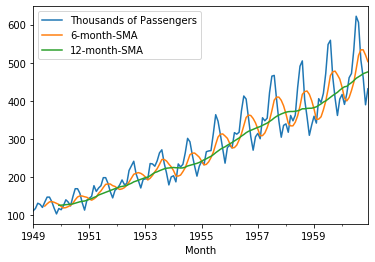

In [7]:
airline.plot()

# EWMA
## Moyennes Mobiles Pondérées Exponentiellement 

Nous venons de montrer comment calculer la moyenne mobile simple SMA à partir d'une période, mais la SMA de base a quelques "faiblesses".
* Des périodes plus petites entraîneront plus de bruit, plutôt que de signal.
* Elle sera toujours décalée par la taille de la période
* Elle n'atteindra jamais le sommet ou la vallée complète des données en raison du calcul de la moyenne.
* Ne vous informe pas vraiment sur les comportements futurs possibles, tout ce qu'elle fait vraiment c'est de décrire les tendances dans vos données.
* Des valeurs historiques extrêmes peuvent fausser votre SMA de manière significative.

Pour aider à résoudre certains de ces problèmes, nous pouvons utiliser une moyenne mobile pondérée exponentielle (EWMA).

EWMA nous permettra de réduire l'effet de décalage de la SMA et d'accorder plus de poids aux valeurs qui se sont produites plus récemment (en appliquant plus de poids aux valeurs plus récentes, d'où le nom). La quantité de poids appliquée aux valeurs les plus récentes dépendra des paramètres réels utilisés dans l'EWMA et du nombre de périodes correspondant à une taille de fenêtre.
[Tous les détails sur les mathématiques qui se cachent derrière cela peuvent être trouvés ici](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Voici la version abrégée de l'explication de EWMA.

La formule de EWMA est la suivante :

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Où x_t est la valeur d'entrée, w_i est le poids appliqué (notez comment il peut passer de i=0 à t), et y_t est la sortie.

Maintenant la question est, comment définir le terme de poids w_i ?

Cela dépend du paramètre d'ajustement que vous fournissez à la méthode .ewm().

Lorsque l'ajustement est True (par défaut), les moyennes pondérées sont calculées à l'aide de poids :

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Lorsque adjust=False est spécifié, les moyennes mobiles sont calculées comme suit :

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

ce qui équivaut à utiliser ces valeurs de poids :

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{si } i < t \\
    (1 - \alpha)^i        & \text{si } i = t.
\end{cases}\end{split}

Quand adjust=True nous avons y0=x0 et à partir de la formule ci-dessus nous avons yt=αxt+(1-α)yt-1, donc il y a une hypothèse que x0 n'est pas une valeur ordinaire mais plutôt un moment pondéré exponentiellement de la série infinie jusque-là.

Il faut avoir 0<α≤1, et bien que depuis la version 0.18.0 il soit possible de passer α directement, il est souvent plus facile de penser à la portée (span), au centre de masse (com) ou à la demi-vie (half-life) d'un moment pondéré exponetiellement :

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{pour span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{pour com}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{pour halflife}\ h > 0
 \end{cases}\end{split}

* span correspond à ce que l'on appelle communément une "moyenne mobile pondérée exponentiellement au jour N".
* com correspond a une interprétation plus physique et peut être considéré en termes de portée: c=(s-1)/2
* halflife est la période de temps pendant laquelle le poids exponentiel est réduit de moitié.
* alpha spécifie directement le facteur de lissage.

In [8]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

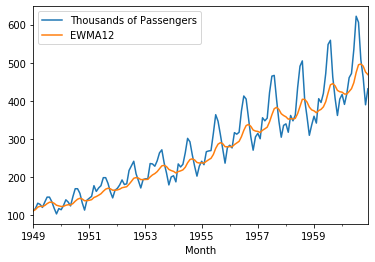

In [9]:
airline[['Thousands of Passengers','EWMA12']].plot()

Super ! C'est tout pour l'instant, passons à la modélisation ARIMA !